In [ ]:
from PIL import Image
from io import BytesIO
import requests

In [ ]:
img_url = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ9ZEPMZBpcBWApQ-OA309ubY8CLWt_qxXwXg&usqp=CAU'

In [ ]:
# 해당 url에서 통신하여 text를 모두 가져온다
requests.get('https://www.naver.com/').text

'   <!doctype html> <html lang="ko" class="fzoom"> <head> <meta charset="utf-8"> <meta name="Referrer" content="origin"> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <title>NAVER</title> <meta name="apple-mobile-web-app-title" content="NAVER"/> <meta name="robots" content="index,nofollow"/> <meta name="description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta property="og:title" content="네이버"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta name="twitter:card" content="summary"> <meta name="twitter:title" content=""> <meta name="twitter:url" content="https://www.naver.com/"> <meta name="twitter:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta name="twitter:description" 

In [ ]:
# 개와 고양이 이미지 가져오기
# image 같은 binary 가져오려면 content 사용
# binary를 16진수로 만든 결과가 출력됨
requests.get(img_url).content

In [ ]:
# byte code로 변환
BytesIO(requests.get(img_url).content)

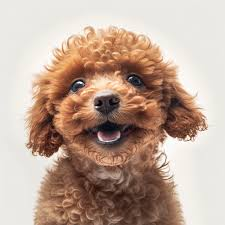

In [ ]:
Image.open(BytesIO(requests.get(img_url).content))

이렇게 key와 endpoint를 주면 클라우드에서 이미지를 분석하여 json형태로 보내줄 것이다!

In [ ]:
# 인증을 위한 key값 - azure에서 생성된
key = '리소스에서 만든 key'

# 접속을 위한 end point
endpoint = '리소스에서 만든 endpoint'
endpoint = endpoint + 'vision/v2.0/'

In [ ]:
# 위의 base url에 추가로 url을 붙여주면 기능이 달라짐

# 이미지 분석이 가능한 endpoint
analyze_endpoint = endpoint + 'analyze'

# 객체 인식이 가능한
detect_endpoint = endpoint + 'detect'

# 글자 인식이 가능한
ocr_endpoint = endpoint + 'ocr'

In [ ]:
headers = {'Ocp-Apim-Subscription-Key' : key}
params = {'visualFeatures' : 'Categories,Description,Color'}
data = {'url' : img_url}

In [ ]:
# post방식으로 요청
response = requests.post(analyze_endpoint,
                         headers = headers,
                         params=params,
                         json=data)

In [ ]:
response

<Response [200]>

In [ ]:
# get result
# 결과를 json 형식으로 받겠다.
result = response.json()
result

{'categories': [],
 'color': {'dominantColorForeground': 'Brown',
  'dominantColorBackground': 'White',
  'dominantColors': ['White', 'Brown'],
  'accentColor': 'A65F25',
  'isBwImg': False,
  'isBWImg': False},
 'description': {'tags': ['dog',
   'brown',
   'animal',
   'mammal',
   'sitting',
   'indoor',
   'wearing',
   'small',
   'looking',
   'bow',
   'close',
   'blue',
   'hanging',
   'large',
   'seat',
   'water',
   'head',
   'frisbee',
   'laying',
   'air',
   'standing'],
  'captions': [{'text': 'a close up of a dog',
    'confidence': 0.9449648501251932}]},
 'requestId': 'fdc4691e-2203-4e92-b397-1fd2a910b3e7',
 'metadata': {'height': 225, 'width': 225, 'format': 'Jpeg'}}

In [ ]:
# 한 줄 요약 출력해보
result['description']['captions'][0]['text']

'a close up of a dog'

object detection

In [ ]:
response = requests.post(detect_endpoint,
                         headers = headers,
                         json=data)

result = response.json()
result

{'objects': [{'rectangle': {'x': 25, 'y': 21, 'w': 199, 'h': 204},
   'object': 'miniature poodle',
   'confidence': 0.518,
   'parent': {'object': 'poodle',
    'confidence': 0.864,
    'parent': {'object': 'dog',
     'confidence': 0.966,
     'parent': {'object': 'mammal',
      'confidence': 0.969,
      'parent': {'object': 'animal', 'confidence': 0.972}}}}}],
 'requestId': '11faae6a-dcdf-4987-a699-aafd2d90b67d',
 'metadata': {'height': 225, 'width': 225, 'format': 'Jpeg'}}

In [ ]:
from PIL import Image, ImageDraw, ImageFont
# 시각화
image = Image.open(BytesIO(requests.get(img_url).content))
draw = ImageDraw.Draw(image)

In [ ]:
def CreateRectangle(objectInfo):
  objects = objectInfo['objects']

  for obj in objects:
    rect = obj['rectangle']
    x = rect['x']
    y = rect['y']
    w = rect['w']
    h = rect['h']

    draw.rectangle(((x, y), (x+w, y+h)), outline='red')

In [ ]:
# 이미지가 수정된 상태
CreateRectangle(result)

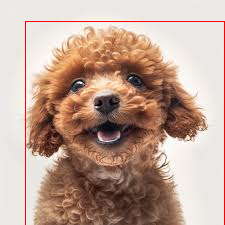

In [ ]:
# checking
image